<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/yanginsuk/study7_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.matlib

In [3]:
class_row= 50
train_class1 = np.random.randn(class_row,2)
train_class2 = np.random.randn(class_row,2) + np.matlib.repmat([3,0],class_row, 1) 
train_class3 = np.random.randn(class_row,2) + np.matlib.repmat([0,3],class_row, 1) 
train = np.vstack([train_class1,train_class2,train_class3]) #병합

train_class1.shape, train_class2.shape,  train_class3.shape, train.shape

((50, 2), (50, 2), (50, 2), (150, 2))

In [4]:
print("train_class1 처음 다섯 행:\n{}".format(train_class1[:5]))
print("train_class2 처음 다섯 행:\n{}".format(train_class2[:5]))
print("train_class3 처음 다섯 행:\n{}".format(train_class3[:5]))

train_class1 처음 다섯 행:
[[-0.16507795  1.56699429]
 [-2.21452145  1.58977734]
 [ 0.28089508  0.91600167]
 [ 1.45892531  0.84100537]
 [ 1.23783796  0.77365244]]
train_class2 처음 다섯 행:
[[ 2.30217018  1.53228287]
 [ 5.81588216 -1.38835349]
 [ 2.01996355  0.72480403]
 [ 2.81417437  0.87304838]
 [ 4.32728266 -0.66265001]]
train_class3 처음 다섯 행:
[[ 0.13190361  4.24600006]
 [ 0.54442424  4.79934851]
 [-0.49955332  3.44547869]
 [ 1.95965616  4.1510602 ]
 [-0.0555377   2.8609924 ]]


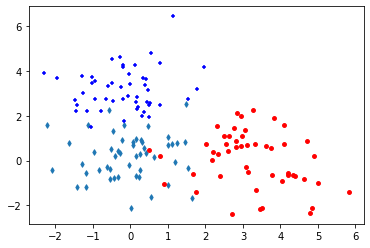

In [91]:
# 클래스 산점도 그리기
import matplotlib.pyplot as plt

plt.scatter(train[0:class_row,0], train[0:class_row,1], s = 15, marker ='d')
plt.scatter(train[class_row:class_row*2,0], train[class_row:class_row*2,1], s = 15, marker='o', color = 'r')
plt.scatter(train[class_row*2:class_row*3,0], train[class_row*2:class_row*3,1], s = 15, marker='+', color = 'b')

plt.figure(1)
plt.show()

In [230]:
test_matrix = np.array([[-0.32511699 2.2 3.2],[4.3 5.5 6.7]])
test_matrix2 = np.array([[0.41543621,2.7,3.8],[4.8,5.8,6.8]])
test_matrix-test_matrix2

array([[-0.7405532, -0.5      , -0.6      ],
       [-0.5      , -0.3      , -0.1      ]])

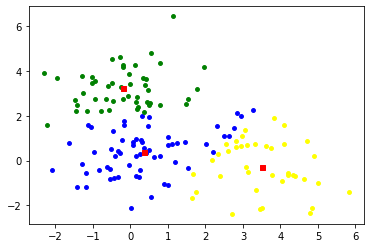

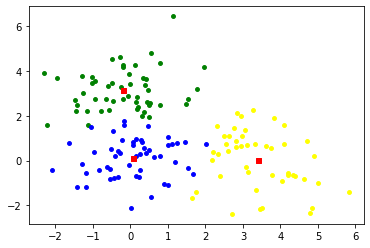

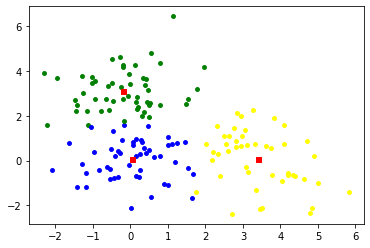

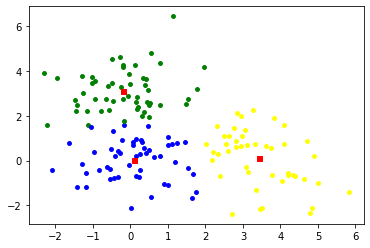

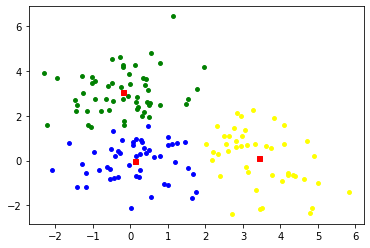

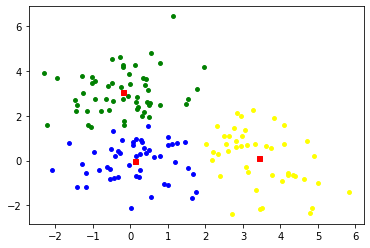

In [266]:
import math
import pandas as pd
from scipy.spatial import distance

N=train.shape[0]
K=3
m=np.zeros([K,2])
Xlabel = np.zeros((N,1))
#Xlabel
i=1
while(i<=K):
  h=np.random.rand(1)
  t=math.floor(h*N)
  #result = np.array_equal(train[t,:],m[0,:])
  if((train[t,:]!=m[0,:]).all() & (train[t,:]!=m[1,:]).all()  & (train[t,:]!=m[2,:]).all() ):
    m[i-1,:]=train[t,:]
    #plt.scatter(m[i-1,0], m[i-1,1], s = 25, marker='s', color = 'r')
  i=i+1

#plt.scatter(train[0:class_row,0], train[0:class_row,1], s = 15, marker ='d',color = 'b')
#plt.scatter(train[class_row:class_row*2,0], train[class_row:class_row*2,1], s = 15, marker='o', color = 'b')
#plt.scatter(train[class_row*2:class_row*3,0], train[class_row*2:class_row*3,1], s = 15, marker='+', color = 'b')
#plt.show()

#print(m)
#print("m:"+format(m))
cmode=["green","yellow","blue"]

for iteration in range(0, 10):
  plt.figure(iteration+1)
  for i in range(0,N):
    minX = np.zeros(0)
    for j in range(0,K):
      minX = np.append(minX, distance.euclidean(train[i,:], m[j,:]))
      #minX = np.append(minX, ((train[i,:]-m[j,:])*(train[i,:]-m[j,:])))
    argType = np.argmin(minX)
    #print("minX:i:"+format(i)+":argType:"+format(argType)+":"+format(minX))
    Xlabel[i] = argType
    plt.scatter(train[i,0], train[i,1], s = 15, color = cmode[argType])
  #print("Xlabel:"+format(Xlabel))
  #array copy
  oldm = m.copy();
  for i in range(0,K):
    #l=Xlabel.find(==i)
    #l = list(filter(lambda i: Xlabel[i] == i, range(len(Xlabel))))
    l = [k for k, value in enumerate(Xlabel) if value == i]
    #print("i:"+format(i)+":l:"+format(l))
    #print("i:"+format(i)+format(train[l,:]))
    m[i,:] = np.mean(train[l,:],axis=0)
    plt.scatter(m[i,0], m[i,1], s = 25, marker='s', color = 'r')
  #array 비교
  if(np.array_equal(oldm,m)):
    break


